#

# Étape 1. Cartographier le problème dans un format natif quantique

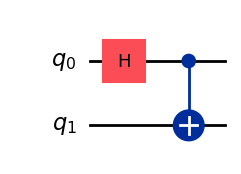

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [2]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

# Étape 2. Optimiser les circuits et les opérateurs

In [5]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


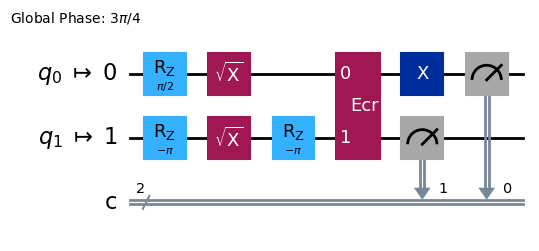

In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import os
from dotenv import load_dotenv
from qiskit import QuantumCircuit

# Charger les variables d'environnement depuis le fichier .env
load_dotenv()

# Récupérer le token depuis le fichier .env
token = os.getenv('IBM_QUANTUM_API_KEY')

# Vérifier si le token est bien récupéré
if not token:
    raise ValueError("Le token IBM_QUANTUM_API_KEY est introuvable dans le fichier .env")

# Sauvegarder le compte IBM Quantum avec le token et le channel
QiskitRuntimeService.save_account(token=token, overwrite=True, channel='ibm_quantum')

# Initialiser le service
service = QiskitRuntimeService()

# Récupérer le backend le moins occupé (hors simulateur)
backend = service.least_busy(simulator=False, operational=True)

# Créer un circuit quantique d'exemple (ou utilise ton propre circuit)
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Générer le pass manager et appliquer les optimisations
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

# Afficher le circuit final
isa_circuit.draw("mpl", idle_wires=False)


In [11]:
# Construct the Estimator instance.
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: cyv0svfjj6dg008g4apg


In [12]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

# Étape 4. Analyser les résultats

In [ ]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()